In [110]:
import pandas as pd
import numpy as np
#import googlemaps
import gmaps
import gmaps.datasets
from config import g_key
import geopandas as gpd
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
gmaps.configure(api_key = g_key)

In [3]:
data = pd.read_csv('source_files/Fire_Data_for_mapping.csv', encoding = "ISO-8859-1", low_memory=False, index_col = 'OBJECTID')
data = data.fillna('')                   # fill empty entries with ''
print(list(data))                        # print Variable Name
data.head()                              # show some data

['address', 'address2', 'apt_room', 'arrive_date_time', 'cleared_date_time', 'dispatch_date_time', 'exposure', 'incident_number', 'incident_type', 'incident_type_description', 'platoon', 'station', 'Longitude', 'Latitude', 'Year', 'Date', 'Arr Time', 'Seconds', 'Incident']


,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
OBJECTID,,,,,,,,,,,,,,,,,,,
474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22,-78.53732007304758,35.891622339123025,2013.0,2013-10-19,0 days 00:05:00.000000000,300,Fire
474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4,-78.6476306369254,35.8781858441652,2014.0,2014-02-14,0 days 00:03:00.000000000,180,Service Call
474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1,-78.63397664076385,35.765387817948216,2012.0,2012-04-29,0 days 00:01:00.000000000,60,Hazardous Condition (No Fire)
474772,"7628 VALVIEW ST RALEIGH, NC 27601",,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18,-78.69139554786135,35.88444729034989,2012.0,2012-04-28,0 days 00:03:00.000000000,180,Service Call
474773,"4201 MANGROVE DR RALEIGH, NC 27603",,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28,-78.51656019368116,35.87272474515293,2014.0,2014-01-26,0 days 00:04:00.000000000,240,Service Call


In [4]:
center_lat = '35.787743'
center_long = '-78.644257'
print('center = ',center_lat,center_long)

center =  35.787743 -78.644257


In [5]:
fire_loc = pd.DataFrame(data)
fire_loc = fire_loc[fire_loc.Latitude != 'missing']
fire_loc['Latitude'] = pd.to_numeric(fire_loc['Latitude'])
fire_loc['Longitude'] = pd.to_numeric(fire_loc['Longitude'])

fire_loc.head()

,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
OBJECTID,,,,,,,,,,,,,,,,,,,
474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22,-78.537320,35.891622,2013.0,2013-10-19,0 days 00:05:00.000000000,300,Fire
474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4,-78.647631,35.878186,2014.0,2014-02-14,0 days 00:03:00.000000000,180,Service Call
474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1,-78.633977,35.765388,2012.0,2012-04-29,0 days 00:01:00.000000000,60,Hazardous Condition (No Fire)
474772,"7628 VALVIEW ST RALEIGH, NC 27601",,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18,-78.691396,35.884447,2012.0,2012-04-28,0 days 00:03:00.000000000,180,Service Call
474773,"4201 MANGROVE DR RALEIGH, NC 27603",,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28,-78.516560,35.872725,2014.0,2014-01-26,0 days 00:04:00.000000000,240,Service Call


In [6]:
len(fire_loc)

158421

In [7]:
locations = fire_loc[['Latitude', 'Longitude']]
fig = gmaps.figure(map_type='TERRAIN')
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 200
heatmap_layer.point_radius = 5
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
fp = 'Shp_files/Zip_Codes.shp'

map_df = gpd.read_file(fp)
map_df.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,14,YOUNGSVILLE,27596.0,YOUNGSVILLE 27596,YOUNGSVILLE,5.895366e+07,36862.720908,None,"POLYGON ((2185788.569720805 795376.804115817, ..."
1,15,RALEIGH,27616.0,RALEIGH 27616,RALEIGH,6.369874e+08,200568.559138,None,"POLYGON ((2124923.251776129 764611.3274791688,..."
2,16,RALEIGH,27612.0,RALEIGH 27612,RALEIGH,4.245758e+08,151746.618810,None,"POLYGON ((2077612.405012071 776688.0002584159,..."
3,17,WENDELL,27591.0,WENDELL 27591,WENDELL,1.324757e+09,257124.620339,2018-01-22T13:29:24.000Z,"POLYGON ((2204915.446666628 742273.3280983716,..."
4,18,RALEIGH,27609.0,RALEIGH 27609,RALEIGH,3.037805e+08,101063.786786,None,"POLYGON ((2101516.987946332 755795.6392789632,..."


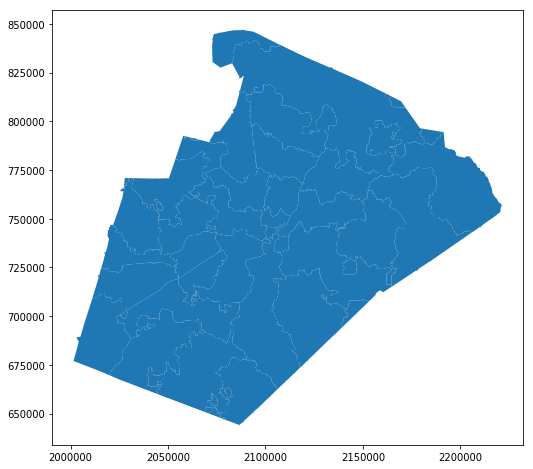

In [10]:
map_df.plot(figsize=(10, 8));


In [11]:
locs = pd.read_csv('Source_files/Fire_Data_for_mapping.csv', header=0, low_memory=False)

locs.head()

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.53732007304758,35.891622339123025,2013.0,2013-10-19,0 days 00:05:00.000000000,300.0,Fire
1,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.6476306369254,35.8781858441652,2014.0,2014-02-14,0 days 00:03:00.000000000,180.0,Service Call
2,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.63397664076385,35.765387817948216,2012.0,2012-04-29,0 days 00:01:00.000000000,60.0,Hazardous Condition (No Fire)
3,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.69139554786135,35.88444729034989,2012.0,2012-04-28,0 days 00:03:00.000000000,180.0,Service Call
4,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.51656019368116,35.87272474515293,2014.0,2014-01-26,0 days 00:04:00.000000000,240.0,Service Call


In [12]:
df = locs.loc[locs['Incident']=='Fire']
df.head()

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.53732007304758,35.891622339123025,2013.0,2013-10-19,0 days 00:05:00.000000000,300.0,Fire
13,474782,"2804 POLESDON CT RALEIGH, NC 27614",NaN,,2011-08-15 23:20:00,2011-08-16 00:40:00,2011-08-15 23:15:00,0,11-0023672,111.0,Building fire,C,22.0,-78.59077170274513,35.89973753567295,2011.0,2011-08-15,0 days 00:05:00.000000000,300.0,Fire
18,474787,"306 PELL ST RALEIGH, NC 27601",NaN,,2008-12-18 16:13:00,2008-12-18 16:53:00,2008-12-18 16:10:00,0,08-0035563,100.0,Fire Other,C,3.0,-78.63423902518359,35.787290627992874,2008.0,2008-12-18,0 days 00:03:00.000000000,180.0,Fire
39,474814,"4725 OAK PARK RD RALEIGH, NC 27601",NaN,,2014-04-22 23:23:00,2014-04-23 00:43:00,2014-04-22 23:18:00,0,14-0011716,111.0,Building fire,C,17.0,-78.70252316613531,35.846598593888146,2014.0,2014-04-22,0 days 00:05:00.000000000,300.0,Fire
41,474816,"6509 THE LAKES DR RALEIGH, NC 27601",NaN,,2009-04-03 02:31:00,2009-04-03 02:45:00,2009-04-03 02:26:00,0,09-0009421,131.0,Passenger vehicle fire,B,15.0,-78.62769880302832,35.86834545189503,2009.0,2009-04-03,0 days 00:05:00.000000000,300.0,Fire


In [13]:
len(df)

13381

In [48]:
#merged = map_df.set_index('NAME').join(df.set_index('Incident'))
#merged_df = pd.merge(df, map_df, on='OBJECTID', how='left')
merged_df = pd.concat([df, map_df], ignore_index=True, sort=False)
merged_df.head()

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,...,Seconds,Incident,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0.0,13-0030918,150.0,...,300.0,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,474782,"2804 POLESDON CT RALEIGH, NC 27614",NaN,,2011-08-15 23:20:00,2011-08-16 00:40:00,2011-08-15 23:15:00,0.0,11-0023672,111.0,...,300.0,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,474787,"306 PELL ST RALEIGH, NC 27601",NaN,,2008-12-18 16:13:00,2008-12-18 16:53:00,2008-12-18 16:10:00,0.0,08-0035563,100.0,...,180.0,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,474814,"4725 OAK PARK RD RALEIGH, NC 27601",NaN,,2014-04-22 23:23:00,2014-04-23 00:43:00,2014-04-22 23:18:00,0.0,14-0011716,111.0,...,300.0,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,474816,"6509 THE LAKES DR RALEIGH, NC 27601",NaN,,2009-04-03 02:31:00,2009-04-03 02:45:00,2009-04-03 02:26:00,0.0,09-0009421,131.0,...,300.0,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
len(merged_df)

13443

Text(0.001, 0.225, '2008-2018')

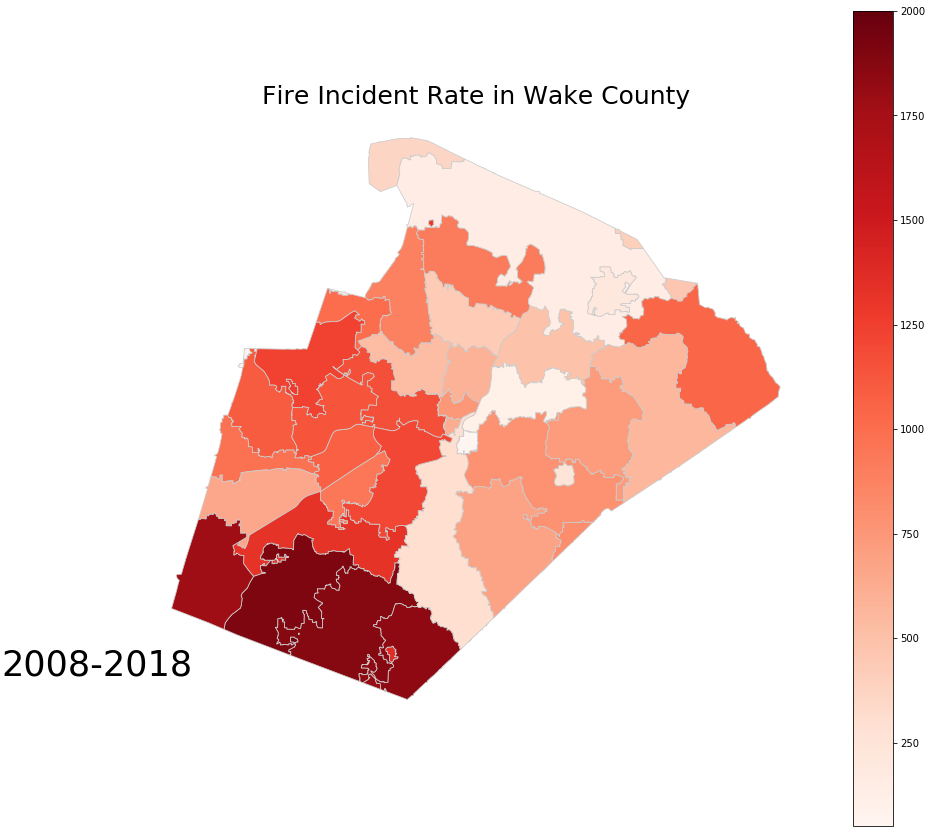

In [136]:
# set a variable that will call column to visualise on the map

variable = 'OBJECTID'

# set the range for the choropleth

vmin, vmax = 50, 2000

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(15, 15))

# create map

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');

ax.axis('off')

ax.set_title('Fire Incident Rate in Wake County', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)

ax.annotate('2008-2018',
            xy=(0.001, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [137]:
fig.savefig("Fire Incident Rate in Wake County 2008-2018.png", dpi=300)

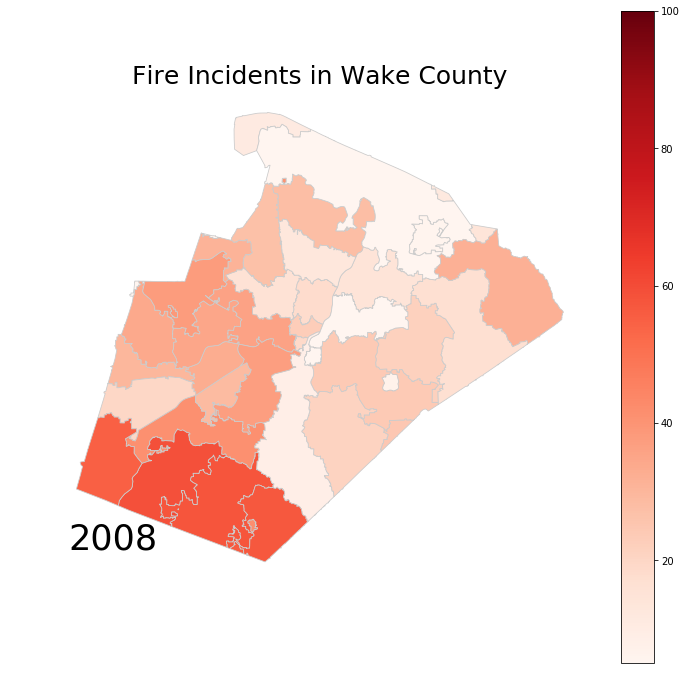

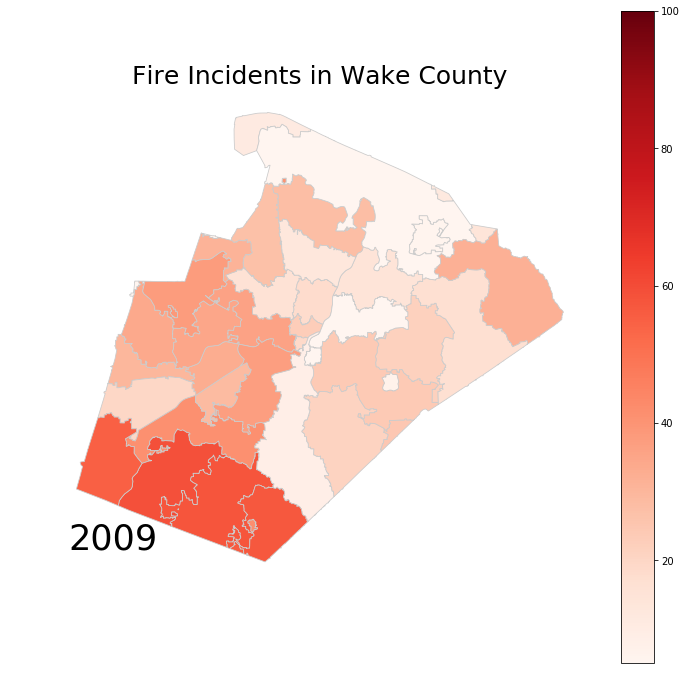

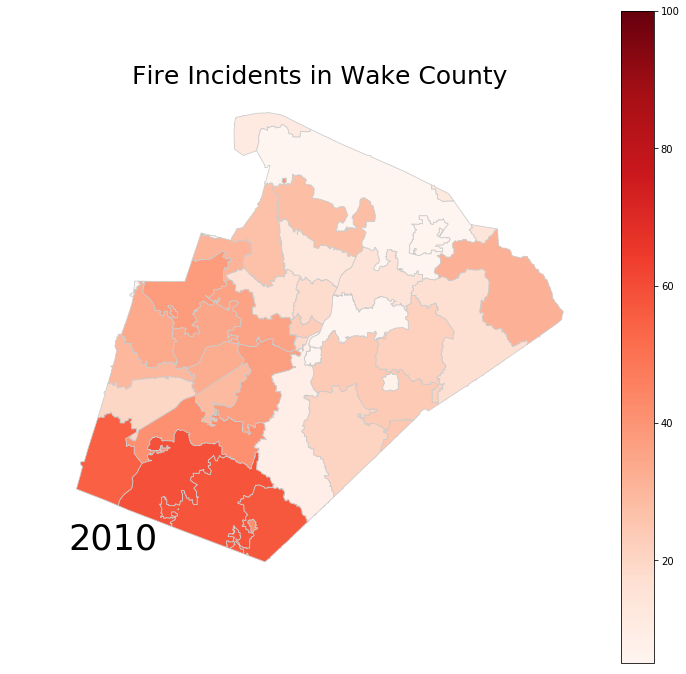

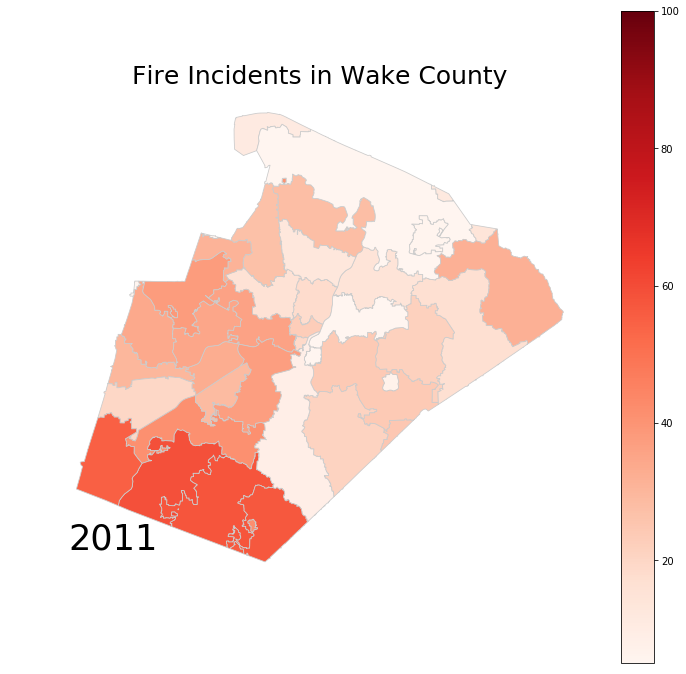

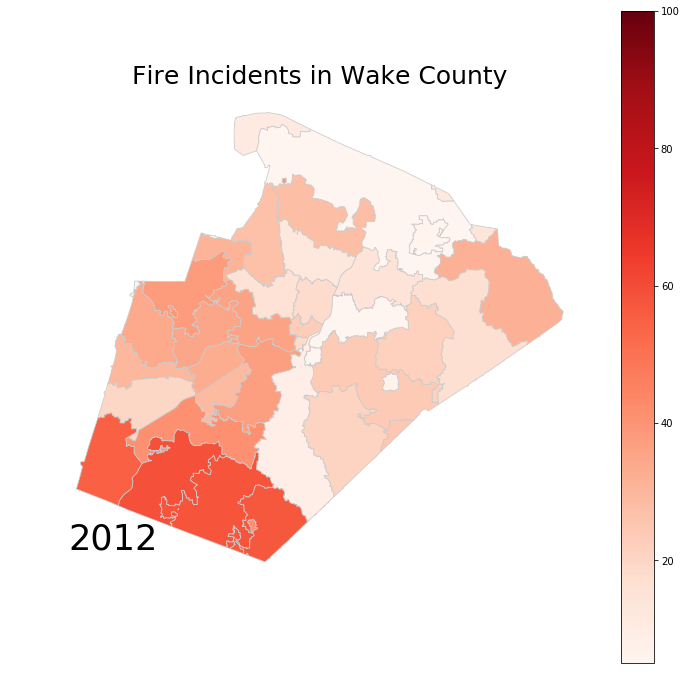

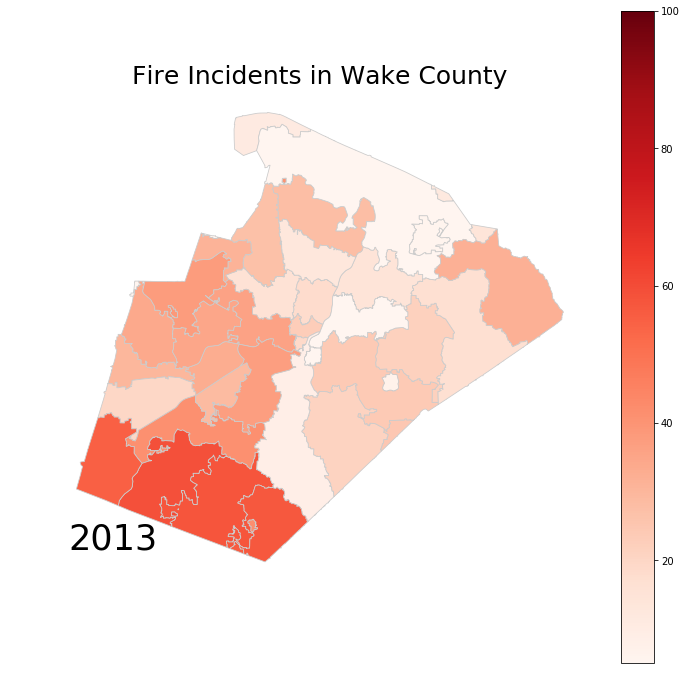

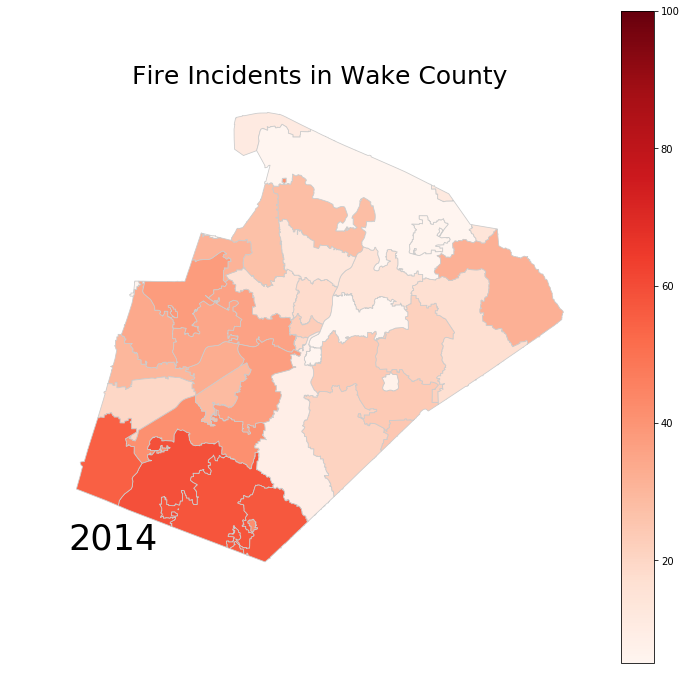

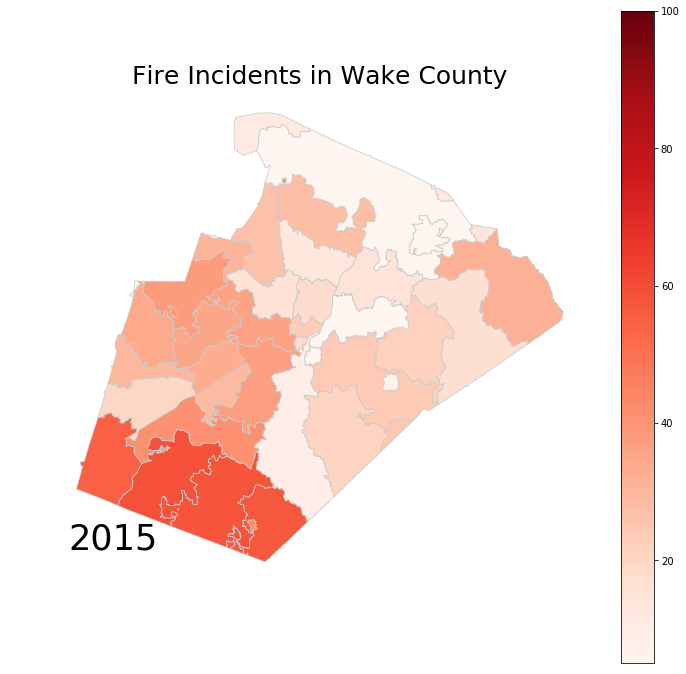

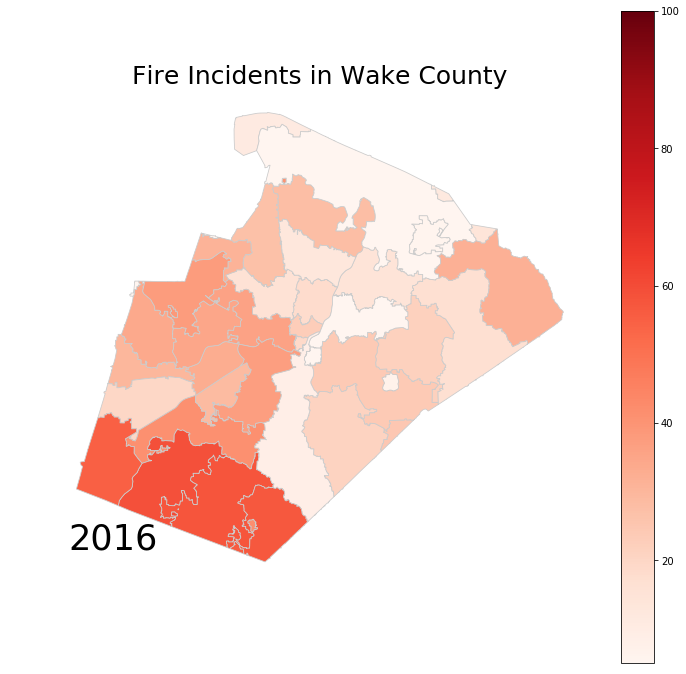

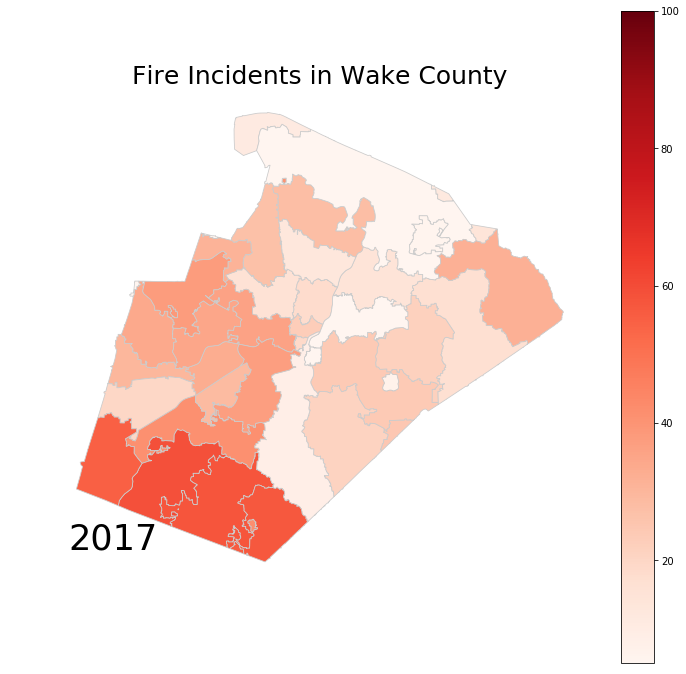

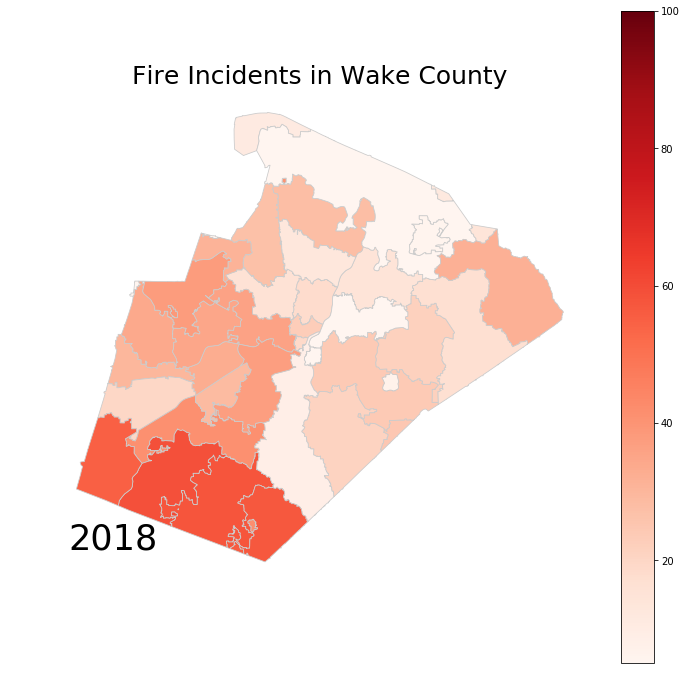

In [117]:
output_path = 'Maps'

# counter for the for loop
i = 0

# list of years
list_of_years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016', '2017', '2018']

vmin, vmax = 5, 100


for year in list_of_years:
    
    plot_year=merged_df.loc[merged_df['Year']==int(year)]
    geo_plot_year = gpd.GeoDataFrame(plot_year)
    fig = merged.plot(column=variable, cmap='Reds', figsize=(12,12),
                         linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
                         legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # removes axis
    fig.axis('off')
    
    # add a title
    fig.set_title('Fire Incidents in Wake County', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # add an annotation
    fig.annotate(int(year),
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    filepath = os.path.join(output_path, year+'_fires.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300);
    